In [63]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
print type(iris)
X = iris.data[:, [2, 3]]
y = iris.target

<class 'sklearn.datasets.base.Bunch'>


In [64]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=0)
print len(X_train), len(X_test), len(y_train), len(y_test)


105 45 105 45


In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [66]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [67]:
y_pred = ppn.predict(X_test_std)
# print y_pred
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 4


In [68]:
from sklearn.metrics import accuracy_score
print ("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [117]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)
    # highlight test samples
    # print X_test
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='b',
            alpha=1.0, linewidth=1, marker='o',
            s=100, label='test set')

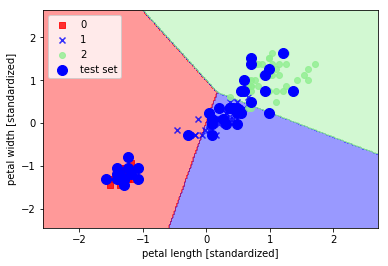

In [118]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.savefig('test.png', dpi = 100)
plt.show()

In [71]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X_std = []
print X[:, 0].mean()
print X[:, 0].std()
X_std[:0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
print X_std
print np.sqrt(2.0/3)

1.0
0.816496580928
[0.0, 1.2247448713915889, -1.2247448713915889]
0.816496580928
